In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [46]:
df = pd.read_csv('/content/winequality-red.csv')

In [47]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [64]:
X = df.drop(columns={'volatile acidity','quality','fixed acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide',	'pH','sulphates'})
print(X)

      density  alcohol  Clusters
0     0.99780      9.4         0
1     0.99680      9.8         0
2     0.99700      9.8         0
3     0.99800      9.8         1
4     0.99780      9.4         0
...       ...      ...       ...
1594  0.99490     10.5         4
1595  0.99512     11.2         4
1596  0.99574     11.0         4
1597  0.99547     10.2         4
1598  0.99549     11.0         3

[1599 rows x 3 columns]


In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
wcss = []
for i in range(1,11):
  k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
  k_means.fit(X_scaled)
  wcss.append(k_means.inertia_)

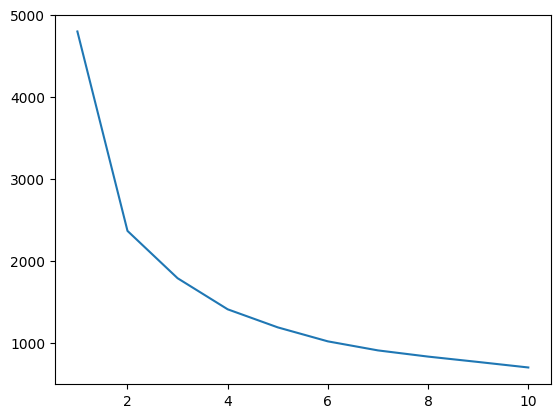

In [67]:
plt.plot(range(1,11),wcss)

In [68]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X_scaled)

In [69]:
df['Clusters'] = Y

In [70]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Clusters
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [71]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Clusters
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


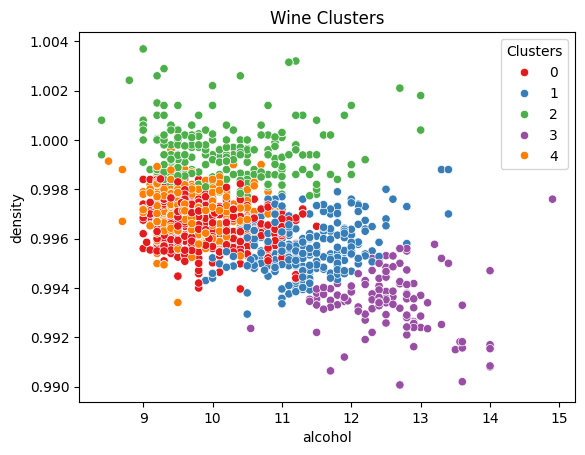

In [73]:
import seaborn as sns
sns.scatterplot(x=df['alcohol'], y=df['density'], hue=df['Clusters'], palette='Set1')
plt.title("Wine Clusters")
plt.show()

In [77]:
pd.crosstab(df['Clusters'], df['quality'])


quality,3,4,5,6,7,8
Clusters,,,,,,
0,6,31,278,165,27,2
1,0,11,50,182,80,8
2,3,5,111,125,38,1
3,0,1,15,69,47,6
4,1,5,227,97,7,1


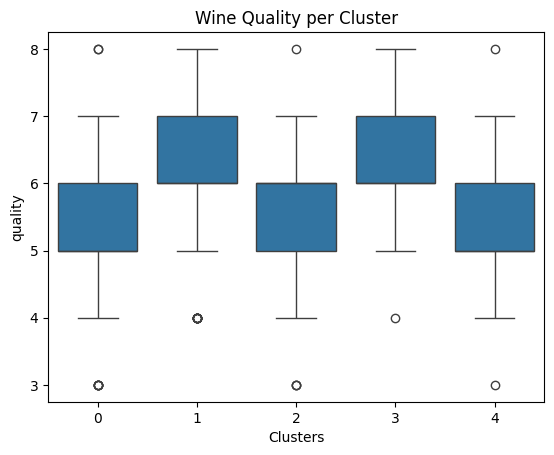

In [81]:
sns.boxplot(x='Clusters', y='quality', data=df)
plt.title('Wine Quality per Cluster')
plt.show()